# Linear decomposition of approximate multi-controlled single qubit gates

## libraries

In [1]:
import numpy as np
from qclib.gates.ldmcu import Ldmcu
from qclib.gates.mcu import MCU
from qiskit import QuantumRegister, QuantumCircuit
import matplotlib.pyplot as plt
from qclib.util import get_cnot_count
from cost import Cost

## Objects and parameters

In [2]:
u = np.array([[0,1], [1,0]]) # X gate
cost = Cost
error = 1e-3
mcu_approx_dummy = MCU(u, num_controls=100, error=error)
base_ctrl_qubits_mcx = mcu_approx_dummy._get_num_base_ctrl_qubits(u, error)

n_base = base_ctrl_qubits_mcx

print(
    'The base circuit have %d qubits for error = %.3f' 
    %(n_base, error)
)

The base circuit have 13 qubits for error = 0.001


In [3]:
cnot_approx=[]
cnot_original = []
base_limit = n_base + 25
for n_controls in range(base_ctrl_qubits_mcx, base_limit):

    controls = QuantumRegister(n_controls)
    target = QuantumRegister(1)
    circuit_approx = QuantumCircuit(controls, target)
    MCU.mcu(circuit_approx, u, controls, target, error)

    cnot_approx.append(get_cnot_count(circ = circuit_approx))
    circuit_og = QuantumCircuit(controls, target)
    Ldmcu.ldmcu(circuit_og, u, controls, target)
    cnot_original.append(get_cnot_count(circ = circuit_og))

print(get_cnot_count(circ = circuit_og))
print(get_cnot_count(circ = circuit_approx))

5330
1680


<a id='figure-11'></a>
## Figure 11 - Comparison of the mathematical upper bound for the count of CNOTs of multi-controlled U(2) gates, for the approximated versions, nb = 13.


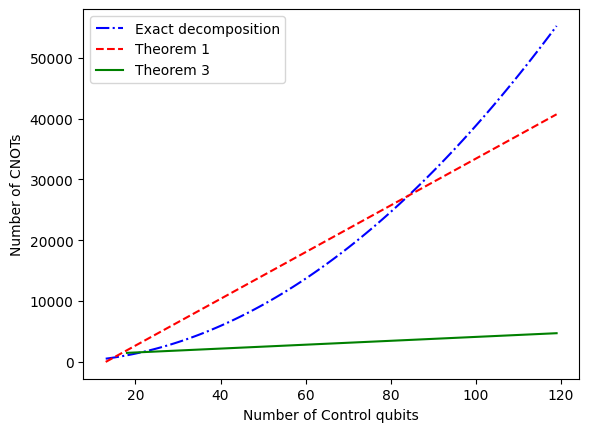

In [4]:
x0 = np.arange(n_base, 120)
x1 = x0[5:]

y_0 = cost.exact_decomposition(x0)
y_1 = cost.theorem_1(n_base, x0)
y_2 = cost.theorem_3(n_base, x1)

plt.plot(x0, y_0, 'b-.')
plt.plot(x0, y_1, 'r--')
plt.plot(x1, y_2, 'g-')

plt.legend(
    ('Exact decomposition', 'Theorem 1', 'Theorem 3'),
    loc = 'upper left', shadow=False
)

plt.xlabel('Number of Control qubits')
plt.ylabel('Number of CNOTs')

plt.rcParams.update({
    "figure.figsize": (7.2, 4.0),
    "font.family": "Times New Roman",
    "font.size": 14
})

plt.show()

---

<a id='figure-12'></a>
## Figure 12 - Comparison of Quantum Circuit Decomposition CNOT cost for multi-controlled U = X gates using different methods

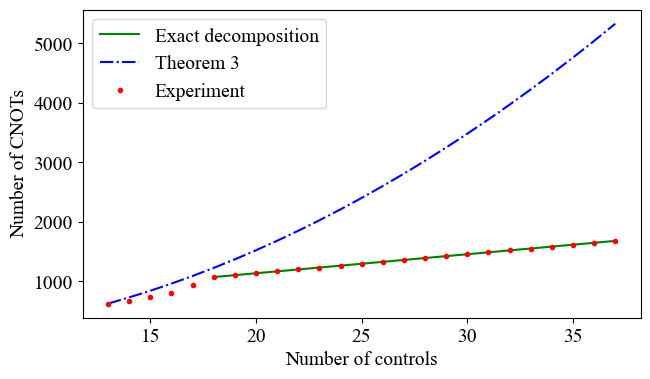

In [5]:
x0 = list(range(base_ctrl_qubits_mcx, base_limit))
x1 = x0[5:]

theorem_3 = [
    cost.theorem_3(n_base, xi - n_base) for xi in x1
]

plt.plot(x1, theorem_3, 'g-')
plt.plot(x0, cnot_original, 'b-.')
plt.plot(x0, cnot_approx, 'r.')

plt.legend(
    ('Exact decomposition', 'Theorem 3', 'Experiment'),
    loc='upper left', shadow=False
)

plt.xlabel('Number of controls')
plt.ylabel('Number of CNOTs')

plt.rcParams.update({
    "figure.figsize": (7.2, 4.0),
    "font.family": "Times New Roman",
    "font.size": 14
})

plt.show()